In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag, FreqDist

In [5]:
from Scrape import MakeHoney

#MakeHoney(word_thresh=8,save_as='fox_scrape10022021')

In [6]:
def csv2list(file_list=[]):
    
    import pandas as pd
    
    df = pd.concat(map(pd.read_csv,file_list))
    df = df.drop(columns=['Unnamed: 0'])
    df = df.drop_duplicates()
    
    headlines_list = df.values.tolist()
    
    def List2String(listy):
        string = ''
        for ele in listy:
            string += ele
        return string
    
    headlines = [List2String(headline) for headline in headlines_list]
    
    return headlines

#files = ['scraped_pages/fox_scrape09092021.csv','scraped_pages/fox_scrape09102021.csv','scraped_pages/fox_scrape09112021.csv','scraped_pages/fox_scrape09122021.csv','scraped_pages/fox_scrape09122021B.csv','scraped_pages/fox_scrape09132021.csv','scraped_pages/fox_scrape09142021.csv','scraped_pages/fox_scrape09152021.csv','scraped_pages/fox_scrape09202021.csv',
        #'fox_scrape09212021.csv','fox_scrape09242021.csv','fox_scrape09252021.csv','fox_scrape09292021.csv','fox_scrape10022021.csv']

#Fox = csv2list(files)
#len(Fox)

In [7]:
files2 = ['scraped_pages/fox_scrape09092021.csv','scraped_pages/fox_scrape09102021.csv','scraped_pages/fox_scrape09112021.csv','scraped_pages/fox_scrape09122021.csv','scraped_pages/fox_scrape09122021B.csv','scraped_pages/fox_scrape09132021.csv','scraped_pages/fox_scrape09142021.csv','scraped_pages/fox_scrape09152021.csv','scraped_pages/fox_scrape09202021.csv',
        'fox_scrape09212021.csv','fox_scrape09242021.csv','fox_scrape09252021.csv','fox_scrape09292021.csv']
Fox = csv2list(files2)
len(Fox)

1333

In [8]:
Fox[:24]

["Biden admin trying to reverse all of Trump's accomplishments: Tammy Bruce",
 'Chip Roy: Fentanyl overdoses skyrocketing because Biden refuses to secure the border',
 'Rep. Mike Gallagher on why Dr. Anthony Fauci must resign',
 '‘The Lost Calls of 9/11’ debuts on Fox Nation',
 'Former CIA senior intel officer says moral obligation in Afghanistan is to get US allies out',
 'Trump praises Gutfeld: Your ratings are great but beating untalented people',
 'Chris Wallace talks bringing 9/11 architect to justice',
 'Immunologist analyzes messaging from Biden administration on vaccines',
 "Kayleigh McEnany shreds 'Orwellian dictatorial tactics and edicts of the left'",
 'Exclusive whistleblower account: Afghan refugees leaving U.S. bases without being fully vetted',
 'President will dictate vaccine, testing requirement for 100M Americans, ratchet up fines for maskless',
 'Biden admin throws full force of federal government at state over abortion law',
 "President 'weaponizing' justice system 

In [9]:
"""Extract Proper Nouns, Verbs, and Adjectives"""

tagd_tokens = [pos_tag(word_tokenize(headline)) for headline in Fox]
tagd_tokens[:10]



nouns = ['NNP','NNPS']
all_nouns = ['NN','NNS','NNP','NNPS']
verbs = ['VB','VBG','VBZ','VBD','VBN','VGP']
adjectives = ['JJ','JJR','JJS']
restrict = ["'","\'",'\'s',"'s",'-','\'','']

actors = [token[0] for headline in tagd_tokens for token in headline if token[1] in nouns]
actors = [ele for ele in actors if not ele in restrict]
actors[:10]

Nouns = [token[0] for headline in tagd_tokens for token in headline if token[1] in all_nouns]
Nouns = [ele for ele in Nouns if not ele in restrict]


actions = [token[0] for headline in tagd_tokens for token in headline if token[1] in verbs]
actions = [ele for ele in actions if not ele in restrict]
actions[:10]

descriptors = [token[0] for headline in tagd_tokens for token in headline if token[1] in adjectives]
descriptors[:10]

Nouns[:10]

['Biden',
 'admin',
 'Trump',
 'accomplishments',
 'Bruce',
 'Chip',
 'Roy',
 'Fentanyl',
 'Biden',
 'border']

In [10]:
actor_freqdist = FreqDist(actors)
action_freqdist = FreqDist(actions)
descriptor_freqdist = FreqDist(descriptors)
noun_freqdist = FreqDist(Nouns)
len(nouns)

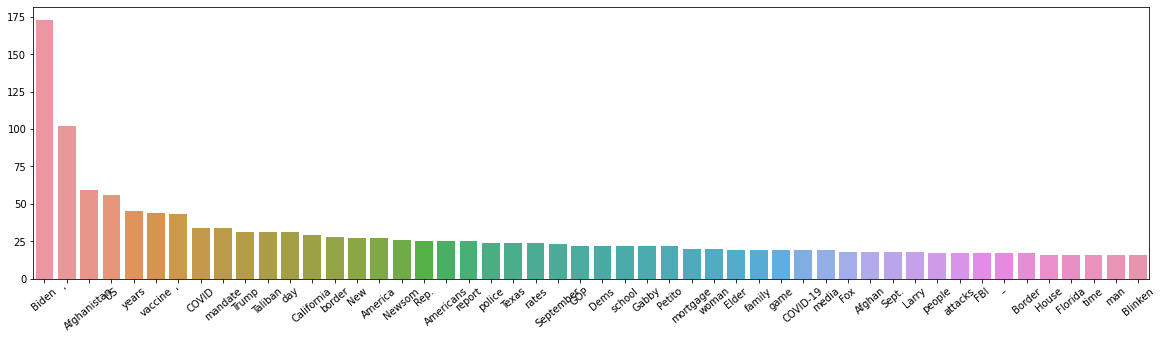

In [11]:
most_common_nouns = noun_freqdist.most_common(50)
noun_series = pd.Series(dict(most_common_nouns))

fig4,ax4 = plt.subplots(figsize=(20,5))
sns.barplot(x=noun_series.index,y=noun_series.values,ax=ax4)
plt.xticks(rotation=40)
plt.show()

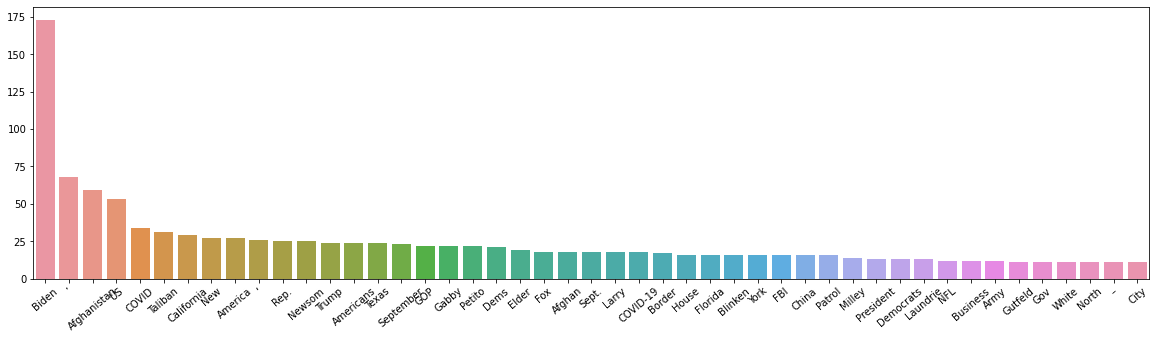

In [12]:
most_common_pnouns = actor_freqdist.most_common(47)
actors_series = pd.Series(dict(most_common_pnouns))


fig0,ax0 = plt.subplots(figsize=(20,5))
sns.barplot(x=actors_series.index,y=actors_series.values,ax=ax0)
plt.xticks(rotation=40)
plt.show()

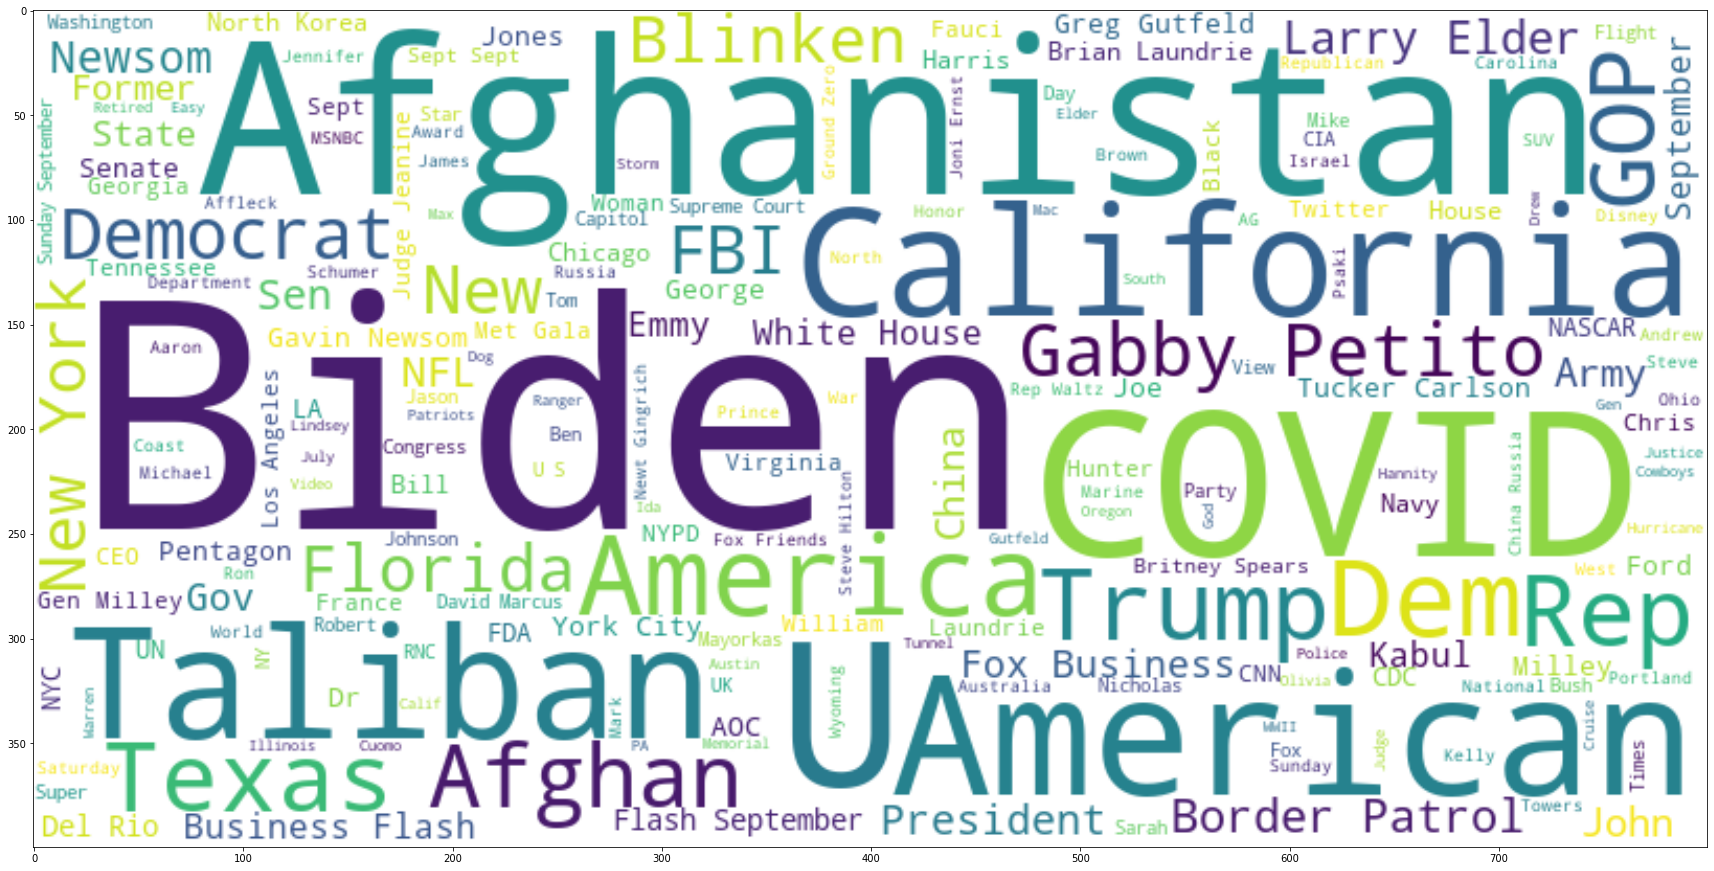

In [13]:
from PIL import Image
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

actor_string = ' '.join(ele for ele in actors)

wc = WordCloud(height=400,width=800,background_color='white').generate(actor_string)
#Display the generated image
plt.figure(figsize=(30,30))
plt.imshow(wc, interpolation="bilinear")

#plt.axis("off")

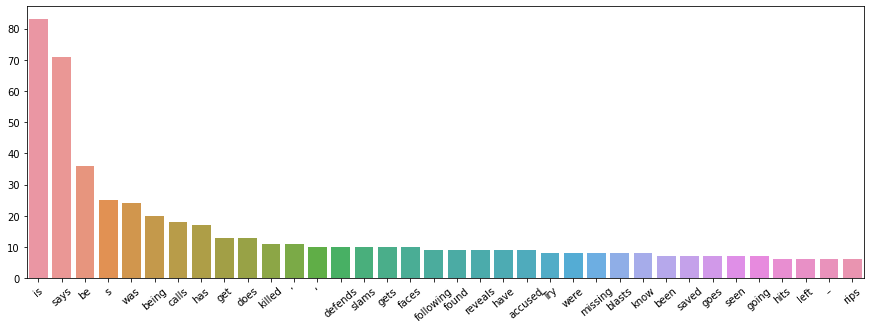

In [14]:
most_common_verbs = action_freqdist.most_common(36)
actions_series = pd.Series(dict(most_common_verbs))

fig1,ax1 = plt.subplots(figsize=(15,5))
sns.barplot(x=actions_series.index,y=actions_series.values,ax=ax1)
plt.xticks(rotation=40)
plt.show()

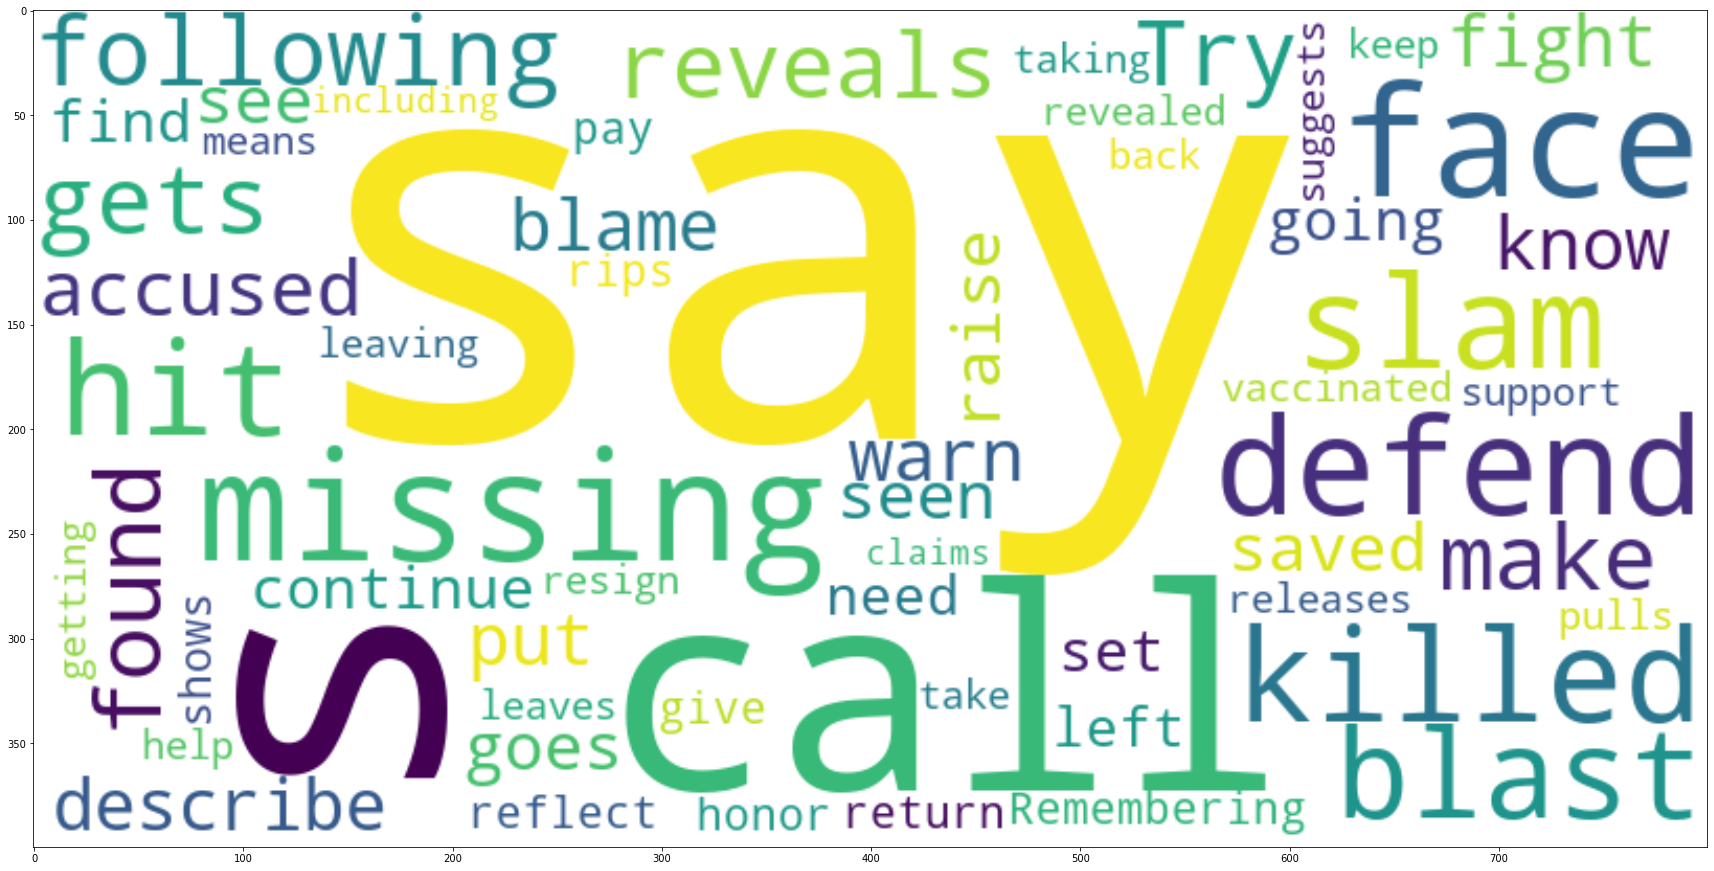

In [15]:
action_string = ' '.join(ele for ele in actions)

wc = WordCloud(width=800,height=400,background_color='white',max_words=60).generate(action_string)
#Display the generated image
plt.figure(figsize=(30,30))
plt.imshow(wc, interpolation="bilinear")




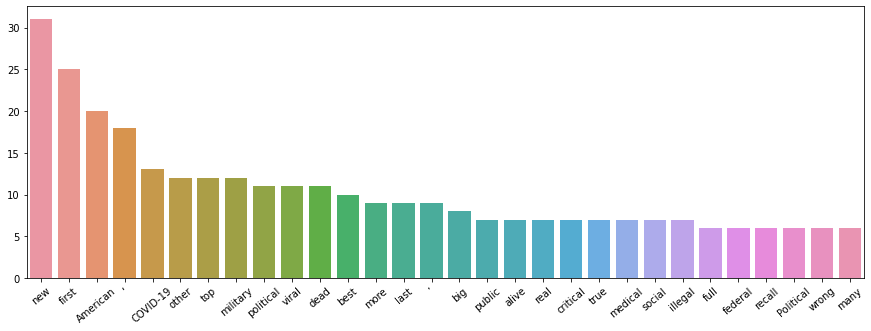

In [16]:
most_common_adjectives = descriptor_freqdist.most_common(30)

descriptors_series = pd.Series(dict(most_common_adjectives))

fig,ax = plt.subplots(figsize=(15,5))
sns.barplot(x=descriptors_series.index,y=descriptors_series.values,ax=ax)
plt.xticks(rotation=40)
plt.show()

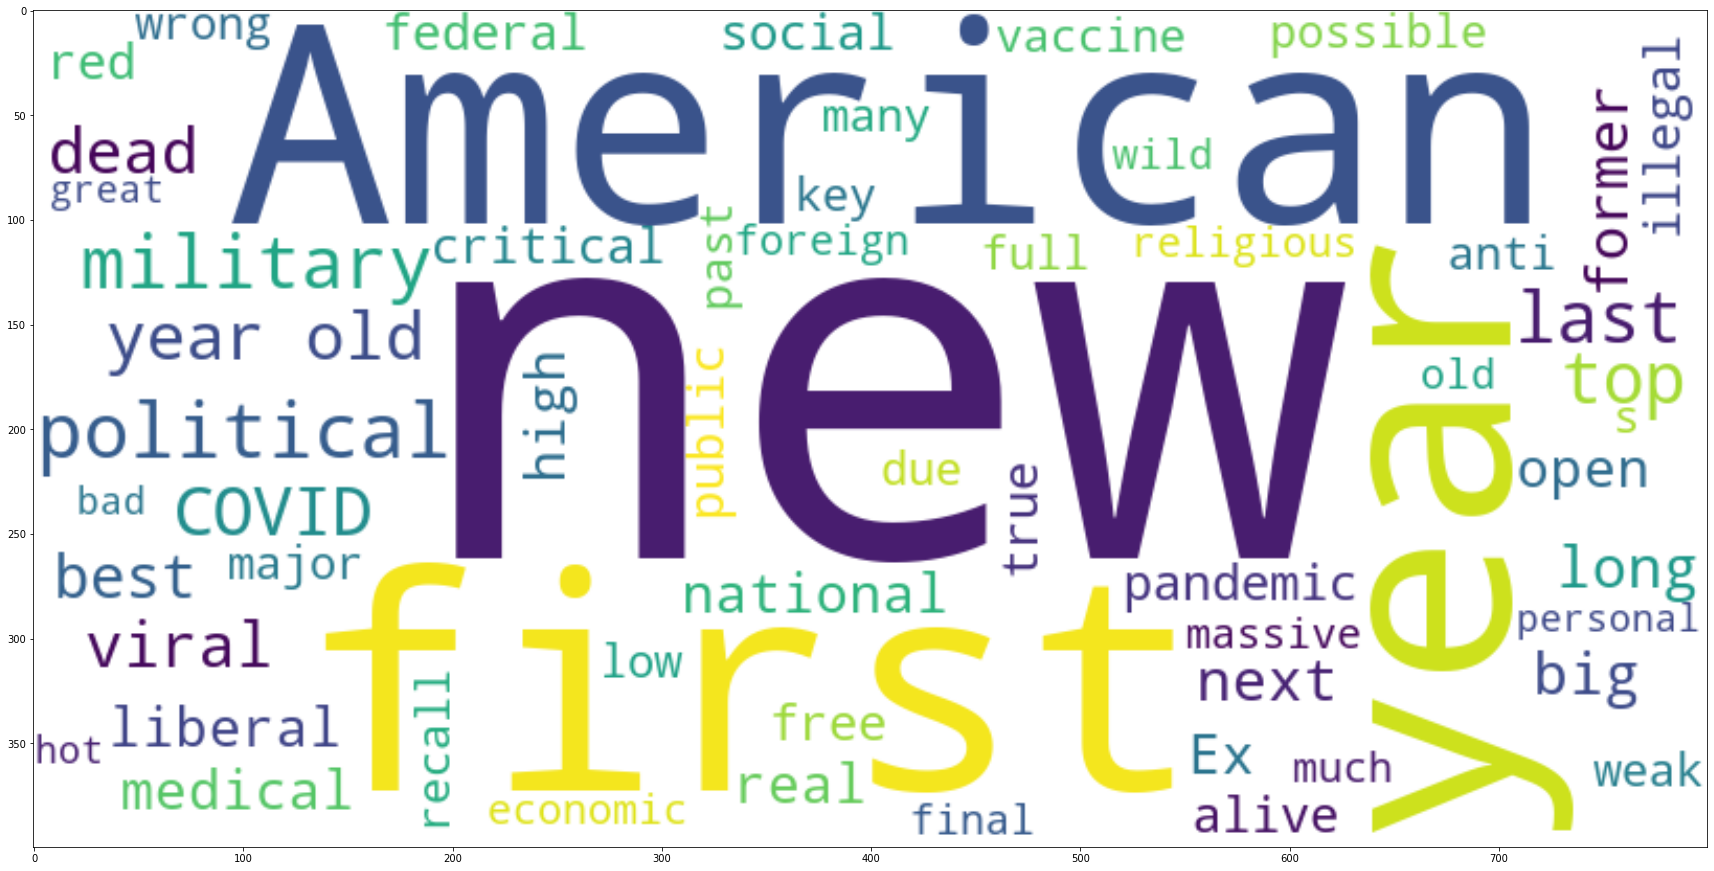

In [17]:
descriptor_string = ' '.join(ele for ele in descriptors)

wc = WordCloud(height=400,width=800,background_color='white',max_words=60).generate(descriptor_string)
#Display the generated image
plt.figure(figsize=(30,30))
plt.imshow(wc, interpolation="bilinear")


In [18]:
"""Calculate proportion of subjective adjectives, summarize word usage findings"""

'Calculate proportion of subjective adjectives, summarize word usage findings'